In [1]:
# dependencies for google colab
! pip install langchain_google_genai
! pip install python-dotenv
! pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 496.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [2]:
import requests
from PIL import Image
import torch
#importing models
from transformers import BlipProcessor, BlipForConditionalGeneration
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv
import os
import re

from langchain import PromptTemplate
from langchain.chains import LLMChain
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import ChatPromptTemplate
import gradio as gr

from diffusers import DiffusionPipeline


In [3]:
load_dotenv()


True

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
Hugging_face_token=os.getenv('hugging_face_token')

In [6]:
! huggingface-cli login --token $Hugging_face_token


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
The token `TristanPadiou` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `TristanPadiou`


In [7]:

# from transformers import Blip2Processor, Blip2ForConditionalGeneration
# import torch

# device = "cuda" if torch.cuda.is_available() else "cpu"

# processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
# model = Blip2ForConditionalGeneration.from_pretrained(
#     "Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16
# )
# model.to(device)
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)

# inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

# generated_ids = model.generate(**inputs)
# generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
# print(generated_text)

In [8]:
# loading image captionning model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to(device, torch.float16)


# loading stable diffusion
pipe = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5")
pipe = pipe.to(device, torch.float16)




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [9]:
# # loading stable diffusion
# pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-3.5-medium")
# pipe = pipe.to(device, torch.float16)


In [10]:
img_url = 'https://novakdjokovicfoundation.org/wp-content/uploads/2015/02/ocean-drawing.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

In [11]:
# # conditional image captioning
# text = "a photography of"
# inputs = processor(raw_image, text, return_tensors="pt").to("cuda")

# out = model.generate(**inputs).
# print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt").to(device, torch.float16)

out = model.generate(**inputs, min_length=20)
print(processor.decode(out[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


there are a lot of jellyfishs and fish in the ocean and a seal fish is swimming


In [12]:
model_prompt=processor.decode(out[0], skip_special_tokens=True)

In [13]:
model_prompt

'there are a lot of jellyfishs and fish in the ocean and a seal fish is swimming'

In [14]:


# Set the model name for our LLMs.
GEMINI_MODEL = "gemini-1.5-flash"

# Store the API key in a variable.
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")

In [15]:
llm = ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)

In [16]:
requirement = input("Please input your requirement for the story: ")

Please input your requirement for the story: short, for  an 8 years old child


In [17]:
query =f' Write a short story based on the content of {model_prompt} and that fits the following requirements: {requirement}. give a detailed description of the charaters appearences '

In [18]:
result = llm.invoke(query)
print(result.content)

Finny the seal pup was a fluffy ball of brown fur, with big, curious eyes like shiny black marbles.  His whiskers twitched constantly, sensing the delicious smells and currents of the ocean.  He had smooth, sleek fur on his belly, and clumsy, adorable flippers that sometimes got tangled as he zoomed through the water.

The ocean was bursting with life!  Thousands of jellyfish pulsed gently, their bodies like shimmering, translucent bells with long, trailing tentacles.  They were mostly pale pink and blue, like underwater balloons.  Finny zipped between them carefully – he knew their stings could be a bit nippy!

Then, there were the fish!  Schools of tiny silver fish, like living glitter, darted past Finny in dazzling flashes.  Bigger, orange and yellow fish with stripes swam lazily, their fins waving gracefully.  One particularly grumpy-looking pufferfish, round and spiky like a tiny, underwater hedgehog, puffed himself up when Finny got too close.  

Finny giggled, his little seal no

In [19]:
story= result.content.replace('\n',' ')
story

'Finny the seal pup was a fluffy ball of brown fur, with big, curious eyes like shiny black marbles.  His whiskers twitched constantly, sensing the delicious smells and currents of the ocean.  He had smooth, sleek fur on his belly, and clumsy, adorable flippers that sometimes got tangled as he zoomed through the water.  The ocean was bursting with life!  Thousands of jellyfish pulsed gently, their bodies like shimmering, translucent bells with long, trailing tentacles.  They were mostly pale pink and blue, like underwater balloons.  Finny zipped between them carefully – he knew their stings could be a bit nippy!  Then, there were the fish!  Schools of tiny silver fish, like living glitter, darted past Finny in dazzling flashes.  Bigger, orange and yellow fish with stripes swam lazily, their fins waving gracefully.  One particularly grumpy-looking pufferfish, round and spiky like a tiny, underwater hedgehog, puffed himself up when Finny got too close.    Finny giggled, his little seal n

In [20]:
# character_extraction_llm=ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)
# schemas=[
#     ResponseSchema(name='character 1', description='character description'),
#     ResponseSchema(name='character 2', description='character description'),
#     ResponseSchema(name='character 3', description='character description')

# ]
# character_parser=StructuredOutputParser.from_response_schemas(schemas)
# instructions=character_parser.get_format_instructions()

In [21]:
# query = f' list the appearance of 3 characters of this {story}'+ '\n\n'+instructions

In [22]:
# result_characters=character_extraction_llm.invoke(query)

In [23]:
# result_characters.content

In [24]:
# characters=character_parser.parse(result_characters.content)
# characters

In [25]:
image_prompt_llm=ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)

schemas=[
    ResponseSchema(name='prompt 1', description='the prompt'),
    ResponseSchema(name='prompt 2', description='the prompt'),
    ResponseSchema(name='prompt 3', description='the prompt'),
    ResponseSchema(name='prompt 4', description='the prompt')
]

parser=StructuredOutputParser.from_response_schemas(schemas)
instructions=parser.get_format_instructions()

In [26]:
query = f' based on this story: {story}. Create 4 prompts for stable diffusion that tells\
 the story in a linear fashion with a consistant drawing style. Make sure to describe the characters everytime\
  The prompts have to be a minimum of 70 and a maximum of 77 tokens long each'+ '\n\n'+instructions




In [27]:
result=image_prompt_llm.invoke(query)
result

AIMessage(content='```json\n{\n  "prompt 1": "A fluffy brown seal pup, Finny, with big black eyes and constantly twitching whiskers, explores a vibrant underwater scene filled with pale pink and blue jellyfish resembling translucent bells.  Finny has smooth sleek fur on his belly and clumsy flippers.  The style is a whimsical, painterly illustration, focusing on the playful energy of the scene.",\n  "prompt 2": "Finny the seal pup, a ball of brown fur with shiny black eyes and twitching whiskers, swims expertly between schools of silver and brightly colored fish. A grumpy pufferfish, round and spiky, puffs up at Finny\'s approach.  Finny\'s smooth belly fur and clumsy flippers are visible.  Painterly, whimsical style, emphasizing underwater light and movement.",\n  "prompt 3": "Finny, a brown seal pup with big black eyes and constantly twitching whiskers, chases playful bright blue fish, their scales sparkling like jewels. He glimpses a giant clam with a pearly rainbow shell. Finny\'s 

In [28]:
image_prompts = parser.parse(result.content)

In [29]:
image_prompts

{'prompt 1': 'A fluffy brown seal pup, Finny, with big black eyes and constantly twitching whiskers, explores a vibrant underwater scene filled with pale pink and blue jellyfish resembling translucent bells.  Finny has smooth sleek fur on his belly and clumsy flippers.  The style is a whimsical, painterly illustration, focusing on the playful energy of the scene.',
 'prompt 2': "Finny the seal pup, a ball of brown fur with shiny black eyes and twitching whiskers, swims expertly between schools of silver and brightly colored fish. A grumpy pufferfish, round and spiky, puffs up at Finny's approach.  Finny's smooth belly fur and clumsy flippers are visible.  Painterly, whimsical style, emphasizing underwater light and movement.",
 'prompt 3': "Finny, a brown seal pup with big black eyes and constantly twitching whiskers, chases playful bright blue fish, their scales sparkling like jewels. He glimpses a giant clam with a pearly rainbow shell. Finny's smooth belly fur and clumsy flippers ar

In [30]:
# prompt = result["text"]
images=[]
for i in image_prompts.keys():

  image = pipe(image_prompts[i]).images[0]
  images.append(image)

  0%|          | 0/50 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (82 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['underwater light and movement .']


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

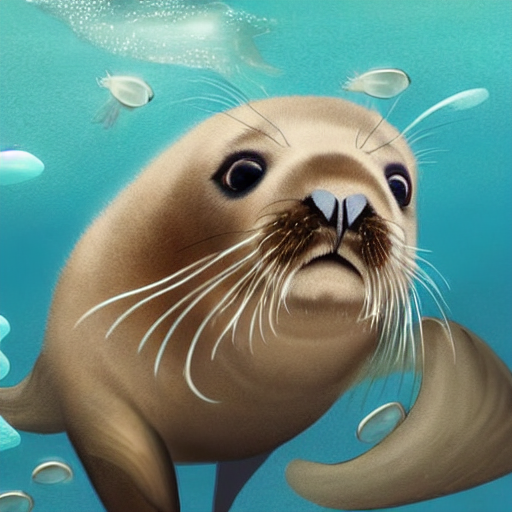

In [31]:
images[0]

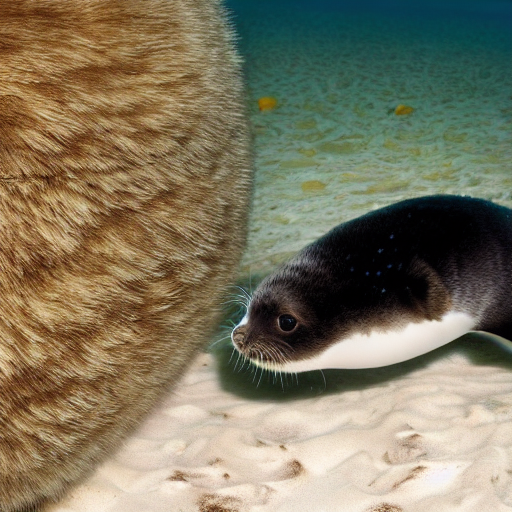

In [32]:
images[1]

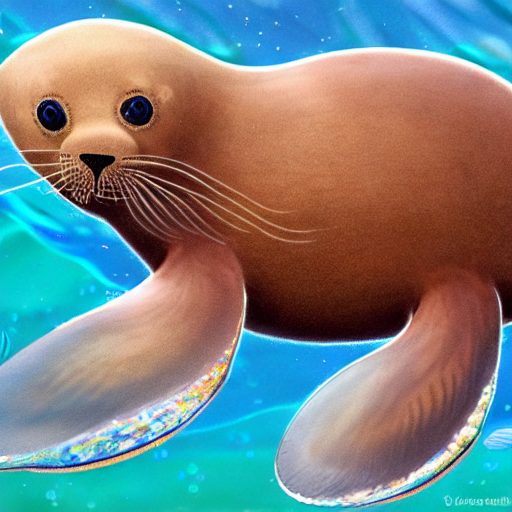

In [33]:
images[2]

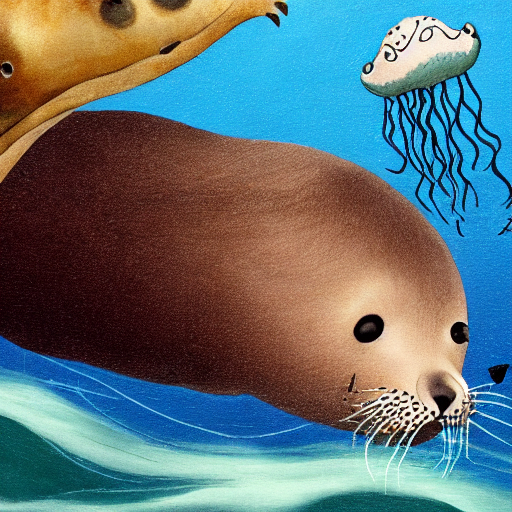

In [34]:
images[3]

In [57]:
def image_story_generator(image,requirement):
  raw_image = Image.open(image)
  inputs = processor(raw_image, return_tensors="pt").to(device, torch.float16)

  out = model.generate(**inputs, min_length=20)
  model_prompt=processor.decode(out[0], skip_special_tokens=True)

  llm = ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)

  query =f' Write a short story based on the content of {model_prompt} and \
  that fits the following requirements: {requirement}. give a detailed \
  description of the charaters appearences '

  result = llm.invoke(query)
  story= result.content.replace('\n',' ')


  image_prompt_llm=ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)

  schemas=[
      ResponseSchema(name='prompt 1', description='the prompt'),
      ResponseSchema(name='prompt 2', description='the prompt'),
      ResponseSchema(name='prompt 3', description='the prompt'),
      ResponseSchema(name='prompt 4', description='the prompt')
  ]

  parser=StructuredOutputParser.from_response_schemas(schemas)
  instructions=parser.get_format_instructions()

  query = f' based on this story: {story}. Create 4 prompts for stable diffusion that tells\
the story in a linear fashion with a consistant drawing style. Make sure to describe the characters everytime\
  The prompts have to be a minimum of 70 and a maximum of 77 tokens long each'+ '\n\n'+instructions

  result=image_prompt_llm.invoke(query)
  image_prompts = parser.parse(result.content)

  images=[]
  for i in image_prompts.keys():

    image = pipe(image_prompts[i]).images[0]
    images.append(image)



  return images, story




In [43]:
images,story=image_story_generator(img_url,requirement)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["details like the jellyfish 's translucent bodies and finley 's curious expression ."]


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['first image , maintaining a whimsical , painterly feel , emphasizing the playful interaction between finley and the other sea creatures .']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["on the action and finley 's determined expression ."]


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["showcasing finley 's contentment and the peaceful underwater environment . focus on the joy in finley 's expression ."]


  0%|          | 0/50 [00:00<?, ?it/s]

In [59]:
# gradio
interface = gr.Interface(
    fn=image_story_generator,
    inputs=[gr.Image(type='filepath'),gr.Textbox('input requirements')],

    outputs=[gr.Image('images'),
        gr.Textbox('story')
    ],
    description='Upload an image to start the story generation process.'
)

interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://05cbeb208b63d4b2b5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
